# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the House prices dataset into dataframe named `data`

In [2]:
data = pd.read_excel("dataset_houseprice_20200106.xls",index_col=0)

# Looking for first five rows of data

In [3]:
data.head()

,Apt_ID,Estimated_Price,Sold_Price,Customer_Nb,Apt_Nb,Mission_Date,Acceptance_Date,Transfer_Date,Floor,Lift,...,Community_Loan,Updated,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description
Mission_Nb,,,,,,,,,,,,,,,,,,,,,
100034597,D22669E77C3C4CA29834B74AC04151B6,NaN,3700000.0,520,51,NaN,NaN,2020-01-13 00:00:00 UTC,3,0,...,34695.38,2020-01-03 14:43:40 UTC,Leilighet,520-004,4.0,1388.0,35.0,HULDREVEIEN,SE,Se Fasiliteter
100034597,D22669E77C3C4CA29834B74AC04151B6,NaN,3700000.0,520,51,NaN,NaN,2020-01-13 00:00:00 UTC,3,0,...,37071.04,2007-01-05 11:43:09 UTC,Leilighet,520-004,4.0,1388.0,35.0,HULDREVEIEN,SE,Se Fasiliteter
100013357,B4E9DB4D94584CC2A6EBA71362020226,NaN,1960000.0,520,51,NaN,NaN,2007-01-05 00:00:00 UTC,3,0,...,34695.38,2020-01-03 14:43:40 UTC,Leilighet,520-004,4.0,1388.0,35.0,HULDREVEIEN,SE,Se Fasiliteter
100013357,B4E9DB4D94584CC2A6EBA71362020226,NaN,1960000.0,520,51,NaN,NaN,2007-01-05 00:00:00 UTC,3,0,...,37071.04,2007-01-05 11:43:09 UTC,Leilighet,520-004,4.0,1388.0,35.0,HULDREVEIEN,SE,Se Fasiliteter
100014251,CD1836E0758B44CCA6668C266F5E3A5D,NaN,1770000.0,526,12,NaN,NaN,2007-08-15 00:00:00 UTC,U1,0,...,26636.88,2020-01-03 11:00:11 UTC,Leilighet,526-008,3.0,1388.0,5.0,OVE JENSENS VEI,SE,Se Fasiliteter


In [4]:
data = data.reset_index()

# Let's look for some important information of dataset.

In [5]:
data.shape

(1000, 26)

> - Dataset is having `1000` records having `26` features.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
Mission_Nb             1000 non-null int64
Apt_ID                 1000 non-null object
Estimated_Price        3 non-null float64
Sold_Price             835 non-null float64
Customer_Nb            1000 non-null int64
Apt_Nb                 1000 non-null int64
Mission_Date           1 non-null object
Acceptance_Date        847 non-null object
Transfer_Date          1000 non-null object
Floor                  809 non-null object
Lift                   1000 non-null int64
Completion_Date        888 non-null object
Living_Area            0 non-null float64
Usable_Area            702 non-null float64
Brutto_Area            31 non-null float64
Primary_Area           44 non-null float64
Community_Loan         962 non-null float64
Updated                912 non-null object
Apt_Type               1000 non-null object
Apt_Category           1000 non-null object
Nb_of_Rooms            916 non-

In [7]:
data.Mission_Nb.is_unique

False

In [8]:
data.Apt_Nb.is_unique

False

> - `Mission_Nb` and `Apt_Nb` are the identifier for the each row. There should be unique values for these columns
> - The above result shows that there are duplicates records present in dataset and we need remove those duplicate records.
> - There are column `Estimated_Price` and `Mission_Date` are having only `3` and `1` records respectively also `Living_Area` is not even having single record. Therefore we can drop this columns. 

In [9]:
data.drop(['Estimated_Price','Mission_Date','Living_Area'],axis = 1, inplace = True)

In [10]:
data.drop_duplicates(subset='Mission_Nb',keep='first',inplace = True)

In [11]:
data.Mission_Nb.is_unique

True

In [12]:
data.Apt_ID.is_unique

True

> - Now we can confirm that there are no duplicates records in dataaset.

### concise summary of a DataFrame after dropping duplicate rows and un-necessary columns

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 999
Data columns (total 23 columns):
Mission_Nb             917 non-null int64
Apt_ID                 917 non-null object
Sold_Price             761 non-null float64
Customer_Nb            917 non-null int64
Apt_Nb                 917 non-null int64
Acceptance_Date        779 non-null object
Transfer_Date          917 non-null object
Floor                  746 non-null object
Lift                   917 non-null int64
Completion_Date        807 non-null object
Usable_Area            637 non-null float64
Brutto_Area            28 non-null float64
Primary_Area           43 non-null float64
Community_Loan         886 non-null float64
Updated                829 non-null object
Apt_Type               917 non-null object
Apt_Category           917 non-null object
Nb_of_Rooms            838 non-null float64
Post_Code              897 non-null float64
Street_Nb              907 non-null float64
Street_Name            917 non-nu

> - Still there are some columns like `Brutto_Area` and `Primary_Area` are having very less records as compared to whole dataset.

In [14]:
data[(data.Primary_Area.notna())][['Usable_Area','Primary_Area']]

,Usable_Area,Primary_Area
210,75.0,72.0
211,89.0,86.0
212,112.0,109.0
213,89.0,86.0
214,74.0,71.0
215,74.0,71.0
216,112.0,109.0
217,89.0,86.0
218,89.0,86.0
219,112.0,109.0


## If we observer data for not null Primary_Area data along with Usable_Area we can see that there is linear relationship.
> Let's confirm the same by plotting Primary_Area vs Usable_Area graph

In [15]:
a = data[(data.Primary_Area.notna())][['Usable_Area','Primary_Area']]

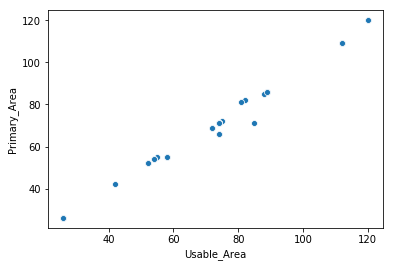

In [16]:
sns.scatterplot(a.Usable_Area,a.Primary_Area)

> + We can fill the null Primary_Area records using this relationship but we will prefer dropping Primary_Area because of linear relationship between those two column.

In [17]:
data.drop('Primary_Area',axis = 1, inplace = True)

In [18]:
data[(data.Usable_Area.notna()) & (data.Brutto_Area.notna())][['Usable_Area','Brutto_Area']]

,Usable_Area,Brutto_Area


> - There are no records where both columns (Usable_Area and Brutto_Area) are having records also, as there are only 28 records in Brutto_Area we can drop that column too as of now. 
> - Let's drop Mission_Nb and Apt_ID as both columns giving same kind of information. It is just ID number to each record in dataset

In [19]:
data.drop(['Brutto_Area','Mission_Nb','Apt_ID'],axis = 1, inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 999
Data columns (total 19 columns):
Sold_Price             761 non-null float64
Customer_Nb            917 non-null int64
Apt_Nb                 917 non-null int64
Acceptance_Date        779 non-null object
Transfer_Date          917 non-null object
Floor                  746 non-null object
Lift                   917 non-null int64
Completion_Date        807 non-null object
Usable_Area            637 non-null float64
Community_Loan         886 non-null float64
Updated                829 non-null object
Apt_Type               917 non-null object
Apt_Category           917 non-null object
Nb_of_Rooms            838 non-null float64
Post_Code              897 non-null float64
Street_Nb              907 non-null float64
Street_Name            917 non-null object
Parking_Type           917 non-null object
Parking_Description    917 non-null object
dtypes: float64(6), int64(3), object(10)
memory usage: 143.3+ KB


## Let's look for the categorical column for their unique values

In [21]:
data.Floor.value_counts()

2                      185
1                      174
3                      159
4                       83
U                       58
2+U                     32
U1                      10
5                        9
2U                       7
U/1                      6
U2                       3
1U                       3
2020-02-01 00:00:00      2
2020-04-03 00:00:00      2
2+L                      2
2V                       1
1+2                      1
4V                       1
401                      1
2/LO                     1
6                        1
1/U                      1
REKK                     1
LOFT                     1
3U                       1
3+L                      1
Name: Floor, dtype: int64

> -  **There are few that we need care about handling `Floor` column.**
> >  1. Some records are having timestamp. We will drop those 4 records.
> >  2. There are some data entry error. i.e. (`U1` and `1U`), (`2U` and `U2`), (`1/U` and `U/1`) can be same. So we can    replace it.

In [22]:
data.Floor = data.Floor.replace(['1U','2U','1/U'],['U1','U2','U/1'])

In [23]:
dt = pd.to_datetime('2020-02-01 00:00:00')
data.drop((data[data['Floor'] == dt]).index, inplace = True)

In [24]:
dt = pd.to_datetime('2020-04-03 00:00:00')
data.drop((data[data['Floor'] == dt]).index, inplace = True)

In [25]:
data.Floor.value_counts()

2       185
1       174
3       159
4        83
U        58
2+U      32
U1       13
U2       10
5         9
U/1       7
2+L       2
2/LO      1
6         1
3+L       1
401       1
4V        1
2V        1
3U        1
REKK      1
LOFT      1
1+2       1
Name: Floor, dtype: int64

In [26]:
data[data.Acceptance_Date.isna() | data.Transfer_Date.isna() | data.Completion_Date.isna()][['Acceptance_Date','Transfer_Date','Completion_Date']]

,Acceptance_Date,Transfer_Date,Completion_Date
0,NaN,2020-01-13 00:00:00 UTC,1969-01-01 00:00:00 UTC
2,NaN,2007-01-05 00:00:00 UTC,1969-01-01 00:00:00 UTC
4,NaN,2007-08-15 00:00:00 UTC,1969-01-01 00:00:00 UTC
6,NaN,2010-06-01 00:00:00 UTC,1969-01-01 00:00:00 UTC
8,NaN,2006-02-15 00:00:00 UTC,1969-01-01 00:00:00 UTC
10,NaN,2007-02-15 00:00:00 UTC,1976-01-01 00:00:00 UTC
11,NaN,2016-09-01 00:00:00 UTC,NaN
12,NaN,2020-01-10 00:00:00 UTC,NaN
13,NaN,2020-01-10 00:00:00 UTC,1973-01-01 00:00:00 UTC
14,NaN,2020-01-10 00:00:00 UTC,2005-11-28 00:00:00 UTC


In [27]:
#data[['Acceptance_Date','Transfer_Date','Completion_Date']]

In [28]:
data['old_in_days'] = (pd.to_datetime(data['Acceptance_Date']) - pd.to_datetime(data['Completion_Date'])).dt.days

In [29]:
data[['old_in_days','Sold_Price']]

,old_in_days,Sold_Price
0,NaN,3700000.0
2,NaN,1960000.0
4,NaN,1770000.0
6,NaN,1775000.0
8,NaN,1475000.0
10,NaN,2800000.0
11,NaN,5500000.0
12,NaN,7250000.0
13,NaN,3820000.0
14,NaN,3600000.0


In [30]:
data[(data.old_in_days.notna()) & (data.Sold_Price.notna())][['old_in_days','Sold_Price']].sort_values('old_in_days',ascending = False)

,old_in_days,Sold_Price
97,25049.0,865000.0
415,20239.0,1860000.0
356,20218.0,2220000.0
371,20180.0,1900000.0
439,20089.0,10.0
417,19867.0,1150000.0
416,19830.0,1200000.0
334,18792.0,2925000.0
339,18430.0,2500000.0
380,17245.0,1525000.0


In [32]:
data['old_in_days_2'] = (pd.to_datetime(data['Transfer_Date']) - pd.to_datetime(data['Completion_Date'])).dt.days

In [33]:
data['old_in_days_2']

0      18639.0
2      13883.0
4      14105.0
6      15126.0
8      13559.0
10     11368.0
11         NaN
12         NaN
13     17175.0
14      5156.0
16     12508.0
18     10157.0
20      8004.0
21     21550.0
23         NaN
24     15706.0
25         NaN
27         NaN
29         NaN
30         NaN
31         NaN
32     13180.0
33         NaN
34     13880.0
35         NaN
36         NaN
37         NaN
38      3090.0
39         NaN
40         NaN
        ...   
962       70.0
963      699.0
964       63.0
966       77.0
968      154.0
970      147.0
971      948.0
972     1353.0
974       21.0
976       77.0
978      875.0
979       21.0
980     5356.0
981     4977.0
982    13331.0
983    13342.0
984     3377.0
985     2802.0
986     5295.0
987      302.0
988     5482.0
991     7228.0
992     2588.0
993     4613.0
994     3113.0
995     3367.0
996     3531.0
997     4327.0
998     4152.0
999    11720.0
Name: old_in_days_2, Length: 913, dtype: float64

In [34]:
data[(data.old_in_days_2.notna()) & (data.Sold_Price.notna())][['old_in_days_2','Sold_Price']].sort_values('old_in_days_2',ascending = False)

,old_in_days_2,Sold_Price
97,25049.0,865000.0
21,21550.0,2350000.0
415,20239.0,1860000.0
356,20218.0,2220000.0
371,20180.0,1900000.0
439,20089.0,10.0
417,19867.0,1150000.0
416,19830.0,1200000.0
334,18792.0,2925000.0
0,18639.0,3700000.0


In [35]:
data.drop(['Acceptance_Date','Transfer_Date','Completion_Date','Updated'],axis = 1,inplace = True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 999
Data columns (total 17 columns):
Sold_Price             757 non-null float64
Customer_Nb            913 non-null int64
Apt_Nb                 913 non-null int64
Floor                  742 non-null object
Lift                   913 non-null int64
Usable_Area            635 non-null float64
Community_Loan         882 non-null float64
Apt_Type               913 non-null object
Apt_Category           913 non-null object
Nb_of_Rooms            834 non-null float64
Post_Code              893 non-null float64
Street_Nb              903 non-null float64
Street_Name            913 non-null object
Parking_Type           913 non-null object
Parking_Description    913 non-null object
old_in_days            722 non-null float64
old_in_days_2          803 non-null float64
dtypes: float64(8), int64(3), object(6)
memory usage: 128.4+ KB


In [37]:
data.drop((data[data.old_in_days.isna()]).index, inplace = True)

In [38]:
data.drop((data[data.old_in_days_2.isna()]).index, inplace = True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 16 to 999
Data columns (total 17 columns):
Sold_Price             699 non-null float64
Customer_Nb            722 non-null int64
Apt_Nb                 722 non-null int64
Floor                  646 non-null object
Lift                   722 non-null int64
Usable_Area            544 non-null float64
Community_Loan         709 non-null float64
Apt_Type               722 non-null object
Apt_Category           722 non-null object
Nb_of_Rooms            721 non-null float64
Post_Code              722 non-null float64
Street_Nb              721 non-null float64
Street_Name            722 non-null object
Parking_Type           722 non-null object
Parking_Description    722 non-null object
old_in_days            722 non-null float64
old_in_days_2          722 non-null float64
dtypes: float64(8), int64(3), object(6)
memory usage: 101.5+ KB


In [40]:
data['Street_Nb'].value_counts()

27.0     52
36.0     33
34.0     32
5.0      19
23.0     19
29.0     18
40.0     18
9.0      17
11.0     17
25.0     16
41.0     15
7.0      13
6.0      13
30.0     13
35.0     13
26.0     13
10.0     13
44.0     12
43.0     12
20.0     12
28.0     11
38.0     11
1.0      11
12.0     11
37.0     10
32.0      9
33.0      9
16.0      8
3.0       8
45.0      8
         ..
57.0      2
58.0      2
83.0      2
94.0      2
87.0      2
74.0      2
54.0      2
103.0     1
60.0      1
53.0      1
75.0      1
128.0     1
113.0     1
62.0      1
91.0      1
79.0      1
122.0     1
81.0      1
100.0     1
142.0     1
93.0      1
124.0     1
104.0     1
92.0      1
115.0     1
78.0      1
108.0     1
76.0      1
96.0      1
133.0     1
Name: Street_Nb, Length: 103, dtype: int64

In [41]:
data.drop((data[data['Post_Code'].isna()]).index, inplace = True)
data.drop((data[data['Street_Nb'].isna()]).index, inplace = True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 16 to 999
Data columns (total 17 columns):
Sold_Price             699 non-null float64
Customer_Nb            721 non-null int64
Apt_Nb                 721 non-null int64
Floor                  646 non-null object
Lift                   721 non-null int64
Usable_Area            544 non-null float64
Community_Loan         708 non-null float64
Apt_Type               721 non-null object
Apt_Category           721 non-null object
Nb_of_Rooms            720 non-null float64
Post_Code              721 non-null float64
Street_Nb              721 non-null float64
Street_Name            721 non-null object
Parking_Type           721 non-null object
Parking_Description    721 non-null object
old_in_days            721 non-null float64
old_in_days_2          721 non-null float64
dtypes: float64(8), int64(3), object(6)
memory usage: 101.4+ KB


In [43]:
data.drop((data[data.Nb_of_Rooms.isna()]).index,axis = 0, inplace = True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 16 to 999
Data columns (total 17 columns):
Sold_Price             699 non-null float64
Customer_Nb            720 non-null int64
Apt_Nb                 720 non-null int64
Floor                  645 non-null object
Lift                   720 non-null int64
Usable_Area            543 non-null float64
Community_Loan         707 non-null float64
Apt_Type               720 non-null object
Apt_Category           720 non-null object
Nb_of_Rooms            720 non-null float64
Post_Code              720 non-null float64
Street_Nb              720 non-null float64
Street_Name            720 non-null object
Parking_Type           720 non-null object
Parking_Description    720 non-null object
old_in_days            720 non-null float64
old_in_days_2          720 non-null float64
dtypes: float64(8), int64(3), object(6)
memory usage: 101.2+ KB


In [45]:
#data[['Sold_Price','Usable_Area','Nb_of_Rooms']]
#data.Usable_Area.replace()
#data.Usable_Area = np.where(data.Usable_Area.isnull(), 0, data.Usable_Area)

In [46]:
fill_usable = (data.groupby('Nb_of_Rooms')['Usable_Area'].mean()).values
data.Nb_of_Rooms.value_counts()

4.0    246
2.0    202
3.0    195
1.0     27
5.0     27
0.0     14
6.0      9
Name: Nb_of_Rooms, dtype: int64

In [47]:
#data.Nb_of_Rooms.apply(lambda x : fill_usable[int(x)-1])
data.Usable_Area = np.where(data.Usable_Area.isnull(), '-', data.Usable_Area)

In [48]:
use_ar = []
for index, row in data.iterrows():
    if row['Usable_Area'] == '-':
        use_ar.append(fill_usable[int(row['Nb_of_Rooms']-1)])
    else:
        use_ar.append(row['Usable_Area'])

In [49]:
data[data.Usable_Area.isna()]

,Sold_Price,Customer_Nb,Apt_Nb,Floor,Lift,Usable_Area,Community_Loan,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description,old_in_days,old_in_days_2


In [50]:
data.Usable_Area = use_ar

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 16 to 999
Data columns (total 17 columns):
Sold_Price             699 non-null float64
Customer_Nb            720 non-null int64
Apt_Nb                 720 non-null int64
Floor                  645 non-null object
Lift                   720 non-null int64
Usable_Area            720 non-null object
Community_Loan         707 non-null float64
Apt_Type               720 non-null object
Apt_Category           720 non-null object
Nb_of_Rooms            720 non-null float64
Post_Code              720 non-null float64
Street_Nb              720 non-null float64
Street_Name            720 non-null object
Parking_Type           720 non-null object
Parking_Description    720 non-null object
old_in_days            720 non-null float64
old_in_days_2          720 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 101.2+ KB


# As `Sold_Price` will be our target variable for building model, we will drop records having null `Sold_Price`

In [52]:
data.drop((data[data.Sold_Price.isna()]).index,axis = 0, inplace = True)

In [53]:
data.drop((data[data.Floor.isna()]).index,axis = 0, inplace = True)

In [58]:
data.drop(['Customer_Nb','Apt_Nb'],axis = 1, inplace = True)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 16 to 999
Data columns (total 15 columns):
Sold_Price             639 non-null float64
Floor                  639 non-null object
Lift                   639 non-null int64
Usable_Area            639 non-null float64
Community_Loan         636 non-null float64
Apt_Type               639 non-null object
Apt_Category           639 non-null object
Nb_of_Rooms            639 non-null float64
Post_Code              639 non-null float64
Street_Nb              639 non-null float64
Street_Name            639 non-null object
Parking_Type           639 non-null object
Parking_Description    639 non-null object
old_in_days            639 non-null float64
old_in_days_2          639 non-null float64
dtypes: float64(8), int64(1), object(6)
memory usage: 79.9+ KB


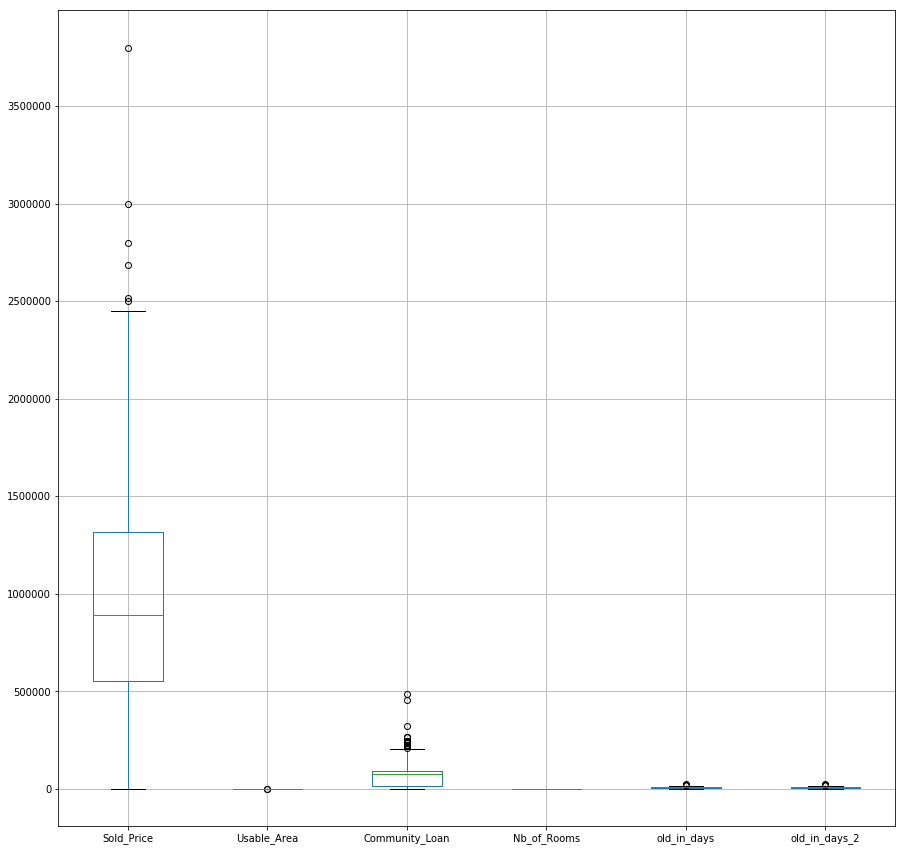

In [139]:
num_data = ['Sold_Price','Usable_Area','Community_Loan','Nb_of_Rooms','old_in_days','old_in_days_2']
num_data = data[num_data].astype('float')
num_data.boxplot(figsize = (15,15));

In [140]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    i = np.where((ys > upper_bound) | (ys < lower_bound))
    return i 

In [141]:
outliers_iqr(num_data['Sold_Price'])

(array([ 51,  52,  57,  67,  83, 142], dtype=int64),)

In [142]:
outliers_iqr(num_data['Usable_Area'])

(array([49, 51], dtype=int64),)

In [143]:
outliers_iqr(num_data['Community_Loan'])

(array([], dtype=int64),)

In [144]:
outliers_iqr(num_data['Nb_of_Rooms'])

(array([], dtype=int64),)

In [145]:
outliers_iqr(num_data['old_in_days'])

(array([ 31,  83,  92, 101, 132, 133, 134, 148], dtype=int64),)

In [146]:
outliers_iqr(num_data['old_in_days_2'])

(array([ 31,  83,  92, 101, 132, 133, 134, 148], dtype=int64),)

In [147]:
for i in num_data.columns:
    up_whisk= num_data[i].quantile(0.75)+1.5*(num_data[i].quantile(0.75) - num_data[i].quantile(0.25))
    for j in num_data[i]:
        if(j > up_whisk):
            data[i] = num_data[i].replace(j,up_whisk)

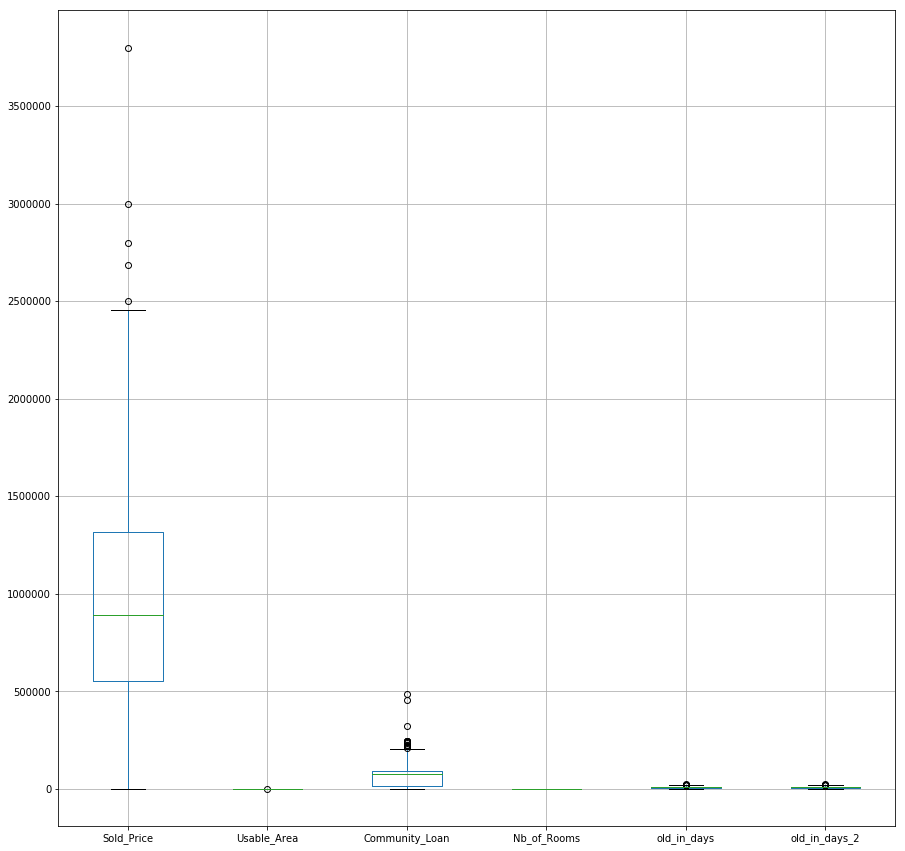

In [149]:
data[['Sold_Price','Usable_Area','Community_Loan','Nb_of_Rooms','old_in_days','old_in_days_2']].boxplot(figsize = (15,15));

In [152]:
data.drop((data[data.Community_Loan.isna()]).index,axis = 0, inplace = True)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 16 to 999
Data columns (total 15 columns):
Sold_Price             636 non-null float64
Floor                  636 non-null object
Lift                   636 non-null int64
Usable_Area            636 non-null float64
Community_Loan         636 non-null float64
Apt_Type               636 non-null object
Apt_Category           636 non-null object
Nb_of_Rooms            636 non-null float64
Post_Code              636 non-null float64
Street_Nb              636 non-null float64
Street_Name            636 non-null object
Parking_Type           636 non-null object
Parking_Description    636 non-null object
old_in_days            636 non-null float64
old_in_days_2          636 non-null float64
dtypes: float64(8), int64(1), object(6)
memory usage: 79.5+ KB


In [158]:
data.sample(10)

,Sold_Price,Floor,Lift,Usable_Area,Community_Loan,Apt_Type,Apt_Category,Nb_of_Rooms,Post_Code,Street_Nb,Street_Name,Parking_Type,Parking_Description,old_in_days,old_in_days_2
602,770000.0,U2,0,64.0,0.00,Leilighet,063-204,2.0,1338.0,27.0,HAMANGSKOGEN,G,Ink. Garasje,4475.0,4475.0
893,670000.0,4,0,55.0,58838.42,Leilighet,026-201,2.0,1346.0,27.0,DÃ˜NSKIVEIEN,SE,Se Fasiliteter,5567.0,5567.0
793,530000.0,4,0,92.0,242680.40,Leilighet,023-041,4.0,1348.0,37.0,BJÃ˜RNEBÃ†RSTIEN,G,Ink. Garasje,8495.0,8495.0
921,903000.0,3,0,71.0,0.00,Leilighet,552-301,3.0,1383.0,11.0,BANKVEIEN,SE,Se Fasiliteter,184.0,184.0
934,930000.0,3,0,83.0,176932.96,Leilighet,046-303,3.0,1341.0,16.0,REVERUDÃ…SEN,G,Ink. Garasje,4808.0,4808.0
605,1760000.0,U1,0,107.0,0.00,Leilighet,063-405,4.0,1338.0,27.0,HAMANGSKOGEN,G,Ink. Garasje,5752.0,5752.0
270,1275000.0,4,0,94.0,47956.18,Leilighet,525-004,4.0,1388.0,95.0,HULDREVEIEN,SE,Se Fasiliteter,12283.0,12283.0
236,1200000.0,2,0,94.0,38896.62,Leilighet,516-402,4.0,1388.0,11.0,HULDREVEIEN,SE,Se Fasiliteter,12296.0,12296.0
524,760000.0,3,0,58.0,60841.87,Leilighet,026-301,3.0,1346.0,27.0,DÃ˜NSKIVEIEN,SE,Se Fasiliteter,10988.0,10988.0
561,846875.0,1,0,87.0,25115.83,Leilighet,565-435,4.0,1385.0,19.0,LIASTUBBEN,G,Ink. Garasje,71.0,71.0


# Normalize data for building model

## Encoding categorical columns into numerical with one hot encoding technique.

In [204]:
# Get dummies
X = pd.get_dummies(data.drop('Sold_Price',axis = 1), prefix_sep='_',) 
X.head()

,Lift,Usable_Area,Community_Loan,Nb_of_Rooms,Post_Code,Street_Nb,old_in_days,old_in_days_2,Floor_1,Floor_2,...,Parking_Description_Ingen,Parking_Description_Ink. Carport,Parking_Description_Ink. Garasje,Parking_Description_Ink. Parkeringsplass,Parking_Description_Inskudds Garasje,Parking_Description_Insludds Carport,Parking_Description_Leier Garasje,Parking_Description_Leier Parkeringsplass,Parking_Description_Se Fasiliteter,Parking_Description_Uspesifisert parkering
16,0,94.000000,34695.38,4.0,1388.0,35.0,12508.0,12508.0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,0,67.000000,26636.88,3.0,1388.0,5.0,10157.0,10157.0,0,0,...,0,0,0,0,0,0,0,0,1,0
20,0,94.000000,34695.38,4.0,1388.0,35.0,8004.0,8004.0,0,0,...,0,0,0,0,0,0,0,0,1,0
51,0,54.815287,82805.07,3.0,1387.0,20.0,9996.0,9996.0,1,0,...,0,0,0,0,0,0,0,0,1,0
52,0,67.000000,33879.89,3.0,1388.0,10.0,12296.0,12296.0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [227]:
from sklearn.preprocessing import StandardScaler

In [228]:
scaler = StandardScaler()

In [229]:
X = scaler.fit_transform(X)

In [231]:
X

array([[-0.07955573,  0.85118265, -0.60023154, ..., -0.11980846,
         2.13984751, -0.10549301],
       [-0.07955573, -0.22811538, -0.7434064 , ..., -0.11980846,
         2.13984751, -0.10549301],
       [-0.07955573,  0.85118265, -0.60023154, ..., -0.11980846,
         2.13984751, -0.10549301],
       ...,
       [-0.07955573, -0.34803738,  3.16018988, ..., -0.11980846,
        -0.46732302, -0.10549301],
       [-0.07955573, -0.7877514 ,  2.79896407, ..., -0.11980846,
        -0.46732302, -0.10549301],
       [-0.07955573,  0.16775618,  2.45162973, ..., -0.11980846,
         2.13984751, -0.10549301]])

In [233]:
y = data['Sold_Price'].values

In [209]:
# importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [235]:
print('Shape of training data :',X.shape)
print('Shape of testing data :',y.shape)

Shape of training data : (636, 335)
Shape of testing data : (636,)


In [199]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 534470.6865624449
RMSE value for k=  2 is: 518059.7521393828
RMSE value for k=  3 is: 538224.4722662352
RMSE value for k=  4 is: 547354.1371807352
RMSE value for k=  5 is: 551831.052919647
RMSE value for k=  6 is: 547671.8969517825
RMSE value for k=  7 is: 553528.6434130135
RMSE value for k=  8 is: 553809.8468368604
RMSE value for k=  9 is: 556954.326538446
RMSE value for k=  10 is: 559185.6384874571
RMSE value for k=  11 is: 558695.3623416775
RMSE value for k=  12 is: 556448.5187482118
RMSE value for k=  13 is: 559213.48027901
RMSE value for k=  14 is: 560547.4779005576
RMSE value for k=  15 is: 558593.190285889
RMSE value for k=  16 is: 558975.4395997379
RMSE value for k=  17 is: 561677.2198856623
RMSE value for k=  18 is: 562293.5087019558
RMSE value for k=  19 is: 561796.9182008224
RMSE value for k=  20 is: 562900.7451680467


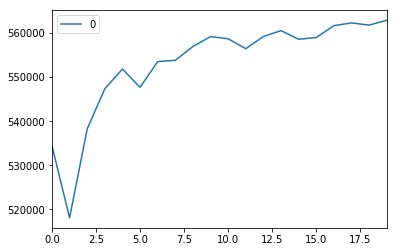

In [200]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [218]:
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [213]:
X_train=tf.cast(X_train,tf.float32)
actual_prices=tf.cast(y_train,tf.float32)

In [220]:
X_train.shape

TensorShape([508, 335])

In [219]:
actual_prices.shape

TensorShape([508])

In [236]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=335, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [237]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -1195970476497.68 (757036899557.06) MSE


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [ ]:
X = data_with_dummies.drop(['Sold_Price','Customer_Nb','Apt_Nb','Community_Loan'],axis = 1)
y = data_with_dummies['Sold_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
#print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

In [ ]:
predictions = regr.predict(X_test)

In [ ]:
# print the coefficients
print(reg.intercept_)
print(reg.coef_)